### EDA

In [9]:
# Import the required libraries
import os  # For handling file system paths
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For enhanced data visualization
import tensorflow as tf  # For deep learning and neural network implementation
from sklearn.model_selection import train_test_split  # For splitting datasets into training and test sets
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve  # For evaluating model performance
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For augmenting image data
from tensorflow.keras.applications import ResNet50  # For loading the pre-trained ResNet50 model
from tensorflow.keras.applications.resnet50 import preprocess_input  # For preprocessing input data to fit ResNet50's requirements
from tensorflow.keras import layers, models  # For building and customizing neural network architectures
from tensorflow.keras.models import Model  # For creating customized models
from tensorflow.keras.losses import CategoricalCrossentropy  # For defining the loss function for multi-class classification
from tensorflow.keras.callbacks import ModelCheckpoint  # For saving the best model during training
import keras_tuner as kt  # For hyperparameter tuning using Keras Tuner


### Step 1: Data Loading

In [10]:
metadata_path = r"C:\\Users\\marti\\Desktop\\dom\\Data\\metadata_f1.csv"  # Path to the metadata file (CSV format)
image_dir = r"C:\\Users\\marti\\Desktop\\dom\\Data"  # Directory containing the image dataset


In [11]:
# Load the metadata into a pandas DataFrame
data = pd.read_csv(metadata_path)  # Reads the CSV file containing metadata into a DataFrame

# Display a preview of the data
print("Data Preview:", data.head())  # Prints the first few rows of the DataFrame to inspect its structure


Data Preview:         isic_id diagnosis  age_approx
0  ISIC_0024306     nevus        45.0
1  ISIC_0024307     nevus        50.0
2  ISIC_0024308     nevus        55.0
3  ISIC_0024309     nevus        40.0
4  ISIC_0024310  melanoma        60.0


## Step 2: Count Images per Label

In [12]:
label_counts = data['diagnosis'].value_counts()
print("\nNumber of images per label:")
print(label_counts)


Number of images per label:
nevus                         7737
pigmented benign keratosis    1338
melanoma                      1305
basal cell carcinoma           622
squamous cell carcinoma        229
vascular lesion                180
dermatofibroma                 160
actinic keratosis              149
Name: diagnosis, dtype: int64


In [23]:
# Add a 'filename' column based on the 'isic_id' column
data['filename'] = data['isic_id'] + ".jpg"  # Appends the '.jpg' extension to each value in the 'isic_id' column

# Display the first few rows to verify the changes
print("Data preview after adding 'filename':", data.head())  # Prints the updated DataFrame with the new 'filename' column


Data preview after adding 'filename':         isic_id diagnosis  age_approx          filename
0  ISIC_0024306     nevus        45.0  ISIC_0024306.jpg
1  ISIC_0024307     nevus        50.0  ISIC_0024307.jpg
2  ISIC_0024308     nevus        55.0  ISIC_0024308.jpg
3  ISIC_0024309     nevus        40.0  ISIC_0024309.jpg
4  ISIC_0024310  melanoma        60.0  ISIC_0024310.jpg


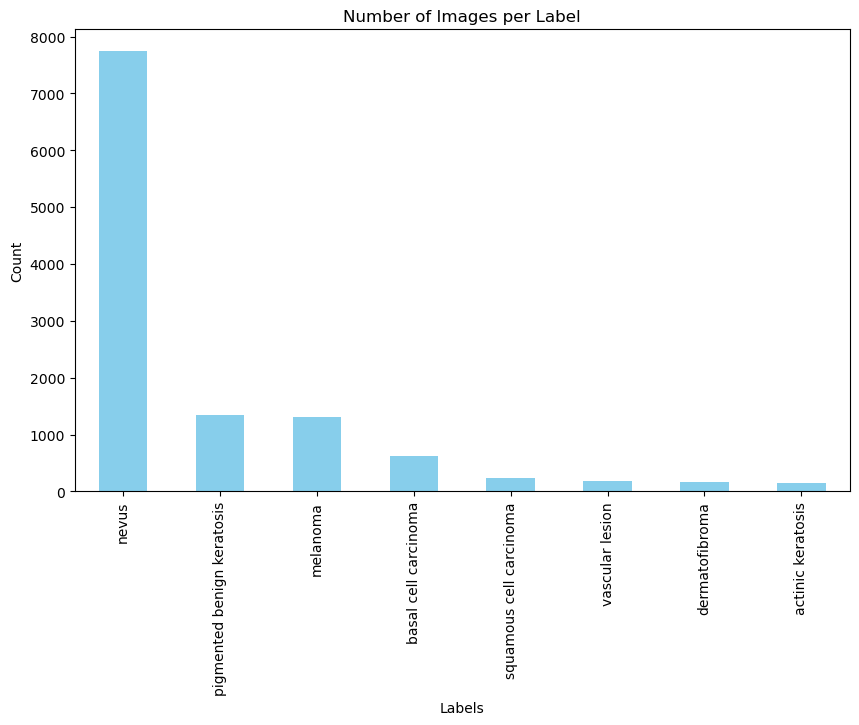

In [14]:
# Plot the counts of images per label
plt.figure(figsize=(10, 6))  # Create a new figure with specified size (10x6 inches)
label_counts.plot(kind='bar', color='skyblue')  # Plot the counts as a bar chart with sky blue bars

# Add title and labels to the plot
plt.title('Number of Images per Label')  # Title of the plot
plt.xlabel('Labels')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis

# Display the plot
plt.show()  # Show the plot in the output window


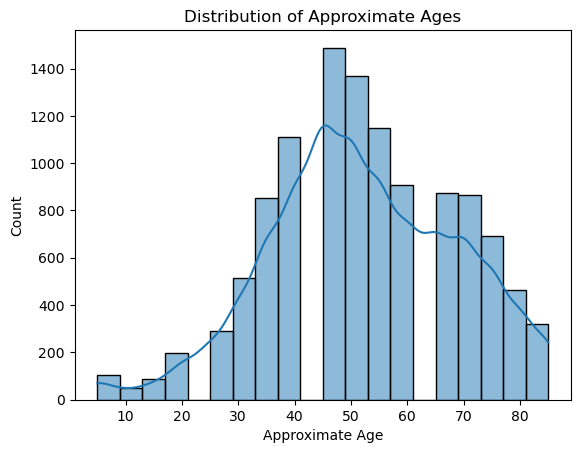

In [15]:
# Plot the distribution of approximate ages
sns.histplot(data['age_approx'], kde=True, bins=20)  # Creates a histogram for the 'age_approx' column, 
                                                  # with a Kernel Density Estimate (KDE) overlayed for smoothness
                                                  # The 'bins=20' argument defines the number of bins in the histogram

# Add title and labels to the plot
plt.title('Distribution of Approximate Ages')  # Sets the title of the plot, indicating it's about age distribution
plt.xlabel('Approximate Age')  # Labels the x-axis as 'Approximate Age'
plt.show()  # Displays the plot in the output window jhkkjnlnl


In [16]:
# Check for missing values in the entire DataFrame
print(data.isnull().sum())  # Prints the count of missing values per column


isic_id         0
diagnosis       0
age_approx    383
filename        0
dtype: int64


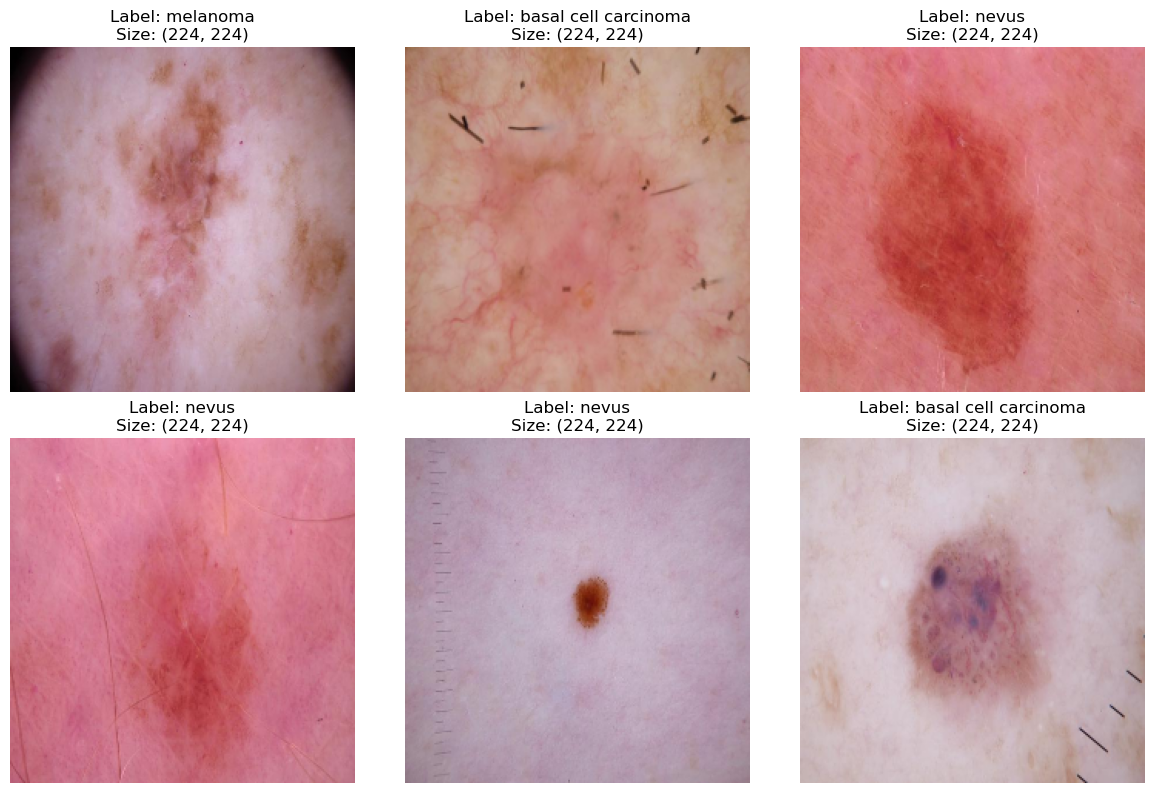

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.image import resize

# Ensure the correct image directory and file extension


# Sample 6 random images from the dataset
sample_data = data.sample(6)
plt.figure(figsize=(12, 8))

for i, row in enumerate(sample_data.itertuples()):
    # Add the image extension (assuming they are '.jpg', adjust if needed)
    image_path = os.path.join(image_dir, f"{row.isic_id}.jpg")  # Ensure the extension is added

    # Check if the file exists before trying to load it
    if os.path.exists(image_path):
        image = mpimg.imread(image_path)
        resized_image = resize(image, (224, 224)).numpy()  # Resize to 224x224
        plt.subplot(2, 3, i + 1)
        plt.imshow(resized_image.astype('uint8'))
        plt.title(f"Label: {row.diagnosis}\nSize: {resized_image.shape[:2]}")
        plt.axis('off')
    else:
        print(f"Image not found: {image_path}")  # Print a message if the image doesn't exist

plt.tight_layout()
plt.show()
